## <div align="center"> PROJECT IS411-C Data Modeling </div>
## <div align="center"> IMPLEMENTASI ALGORITMA MACHINE LEARNING KNN DAN MLR DALAM MEMPREDIKSI HARGA SAHAM PT.BBCA </div>
#### <div align="center"> Even Semester 2023/2024 </div>
---

## KELOMPOK 7

### Anggota:

1. Karin Eldora - 00000068097
2. Zinedine Zethro - 00000067586
3. Darren Donovan- 00000068144
4. Muhammad Ilham - 00000066417
5. Samuel rai - 00000066852

---

## <div align="center"> <u> INTRODUCTION </u> </div>

Penelitian ini mengulas minat yang meningkat dari masyarakat terhadap investasi saham, dengan PT. BBCA sebagai contoh perusahaan yang menerbitkan saham. Analisis fundamental dan teknikal menjadi fokus dalam mengevaluasi investasi saham, yang meskipun menjanjikan, tetap memiliki risiko yang perlu dipertimbangkan dengan cermat. Untuk memprediksi pergerakan harga saham BBCA, proyek ini menggunakan algoritma **K-Nearest Neighbors (KNN)** dan **Multiple Linear Regression (MLR)**. Langkah-langkah teknis yang dilakukan mencakup pengolahan data awal seperti pengisian nilai yang hilang dan normalisasi data, eksplorasi data melalui visualisasi, pembuatan model prediksi menggunakan KNN dan MLR, serta evaluasi model dengan metrik evaluasi seperti Mean Squared Error (MSE), dll. Hasil analisis menunjukkan bahwa algoritma MLR memberikan akurasi yang lebih baik dibandingkan dengan KNN dalam memprediksi harga saham BBCA. Penelitian ini tidak hanya menekankan pentingnya pemilihan model yang tepat dalam prediksi saham, tetapi juga menggarisbawahi bahwa investasi saham memerlukan analisis yang teliti untuk mengurangi risiko.

## <div align="center"> <u> DATA UNDERSTANDING </u> </div>

### # Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BBCAJK.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4917,2024-04-23,9400.0,9775.0,9400.0,9725.0,9725.0,178833000
4918,2024-04-24,9825.0,9950.0,9750.0,9950.0,9950.0,132832700
4919,2024-04-25,10000.0,10000.0,9700.0,9775.0,9775.0,104874100
4920,2024-04-26,9700.0,9825.0,9625.0,9625.0,9625.0,100932900
4921,2024-04-29,9525.0,9850.0,9525.0,9800.0,9800.0,90063500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4922 non-null   object 
 1   Open       4922 non-null   float64
 2   High       4922 non-null   float64
 3   Low        4922 non-null   float64
 4   Close      4922 non-null   float64
 5   Adj Close  4922 non-null   float64
 6   Volume     4922 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 269.3+ KB


## <div align="center"> <u> DATA PREPROCESSING </u> </div>

### # Mengubah Kolom “Date” Menjadi Format Datetime

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4922 non-null   datetime64[ns]
 1   Open       4922 non-null   float64       
 2   High       4922 non-null   float64       
 3   Low        4922 non-null   float64       
 4   Close      4922 non-null   float64       
 5   Adj Close  4922 non-null   float64       
 6   Volume     4922 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 269.3 KB


### # Melakukan Visualisasi Pergerakan Harga Saham BBCA 

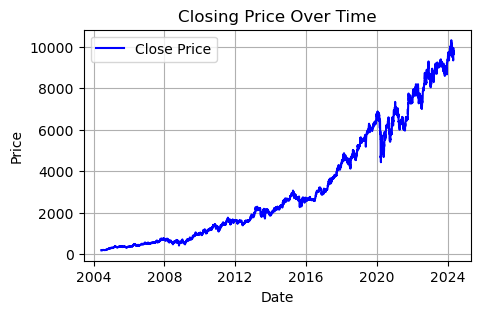

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### # Visualisasi Jumlah Outlier pada Data 

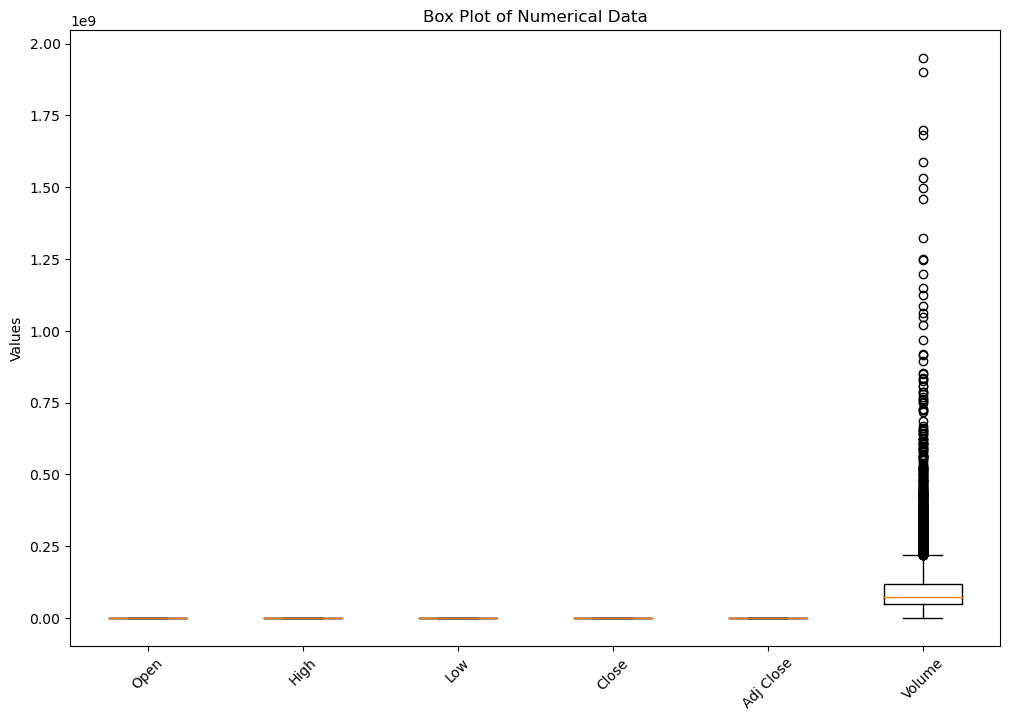

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
plt.boxplot(numerical_columns.values)
plt.title('Box Plot of Numerical Data')
plt.ylabel('Values')
plt.xticks(range(1, len(numerical_columns.columns) + 1), numerical_columns.columns)  
plt.xticks(rotation=45) 
plt.show()

### # Handling Outlier pada Data 

In [7]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(numerical_columns)
threshold = 3
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)

old_df = df
df = df[~outlier_indices]

print("Original DataFrame shape:", old_df.shape)
print("Cleaned DataFrame shape:", df.shape)

Original DataFrame shape: (4922, 7)
Cleaned DataFrame shape: (4831, 7)


### # Visualisasi Korelasi antar Variabel dengan Heatmap

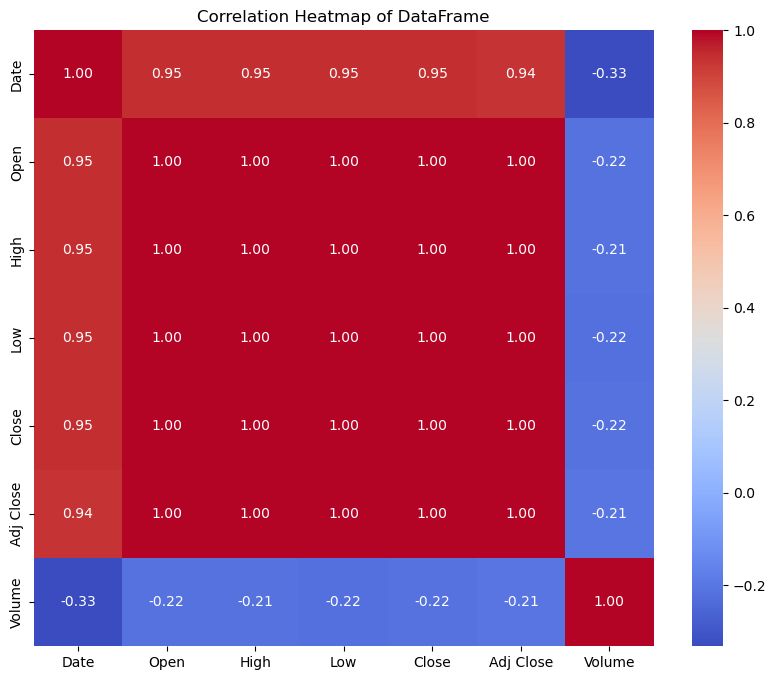

In [8]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of DataFrame')
plt.show()

### # Membagi Data ke dalam Training dan Testing Set

In [9]:
from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Feature Scaling pada Data Training dan Testing 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <div align="center"> <u> MODELLING KNN </u> </div>

## A. K-Nearest Neighbors (KNN) Model

Optimal K: 2


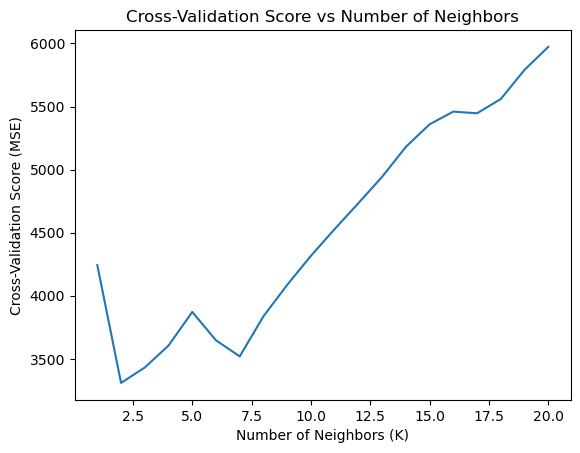

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

neighbors = range(1, 21)
cv_scores = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1 * scores.mean())

optimal_k = neighbors[cv_scores.index(min(cv_scores))]

print("Optimal K:", optimal_k)

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Score (MSE)')
plt.title('Cross-Validation Score vs Number of Neighbors')
plt.show()

In [12]:
knn = KNeighborsRegressor(n_neighbors=2)  
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

## <div align="center"> <u> EVALUATION KNN </u> </div>

### # Nilai MAE, MSE dan RMSE dari KNN 

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

threshold = 0.5
y_pred_knn = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE):", mse)

rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 31.602895553257497
Mean Squared Error (MSE): 3047.4599276111685
Root Mean Squared Error (RMSE): 55.20380356108779


### # Visualisasi Hasil KNN

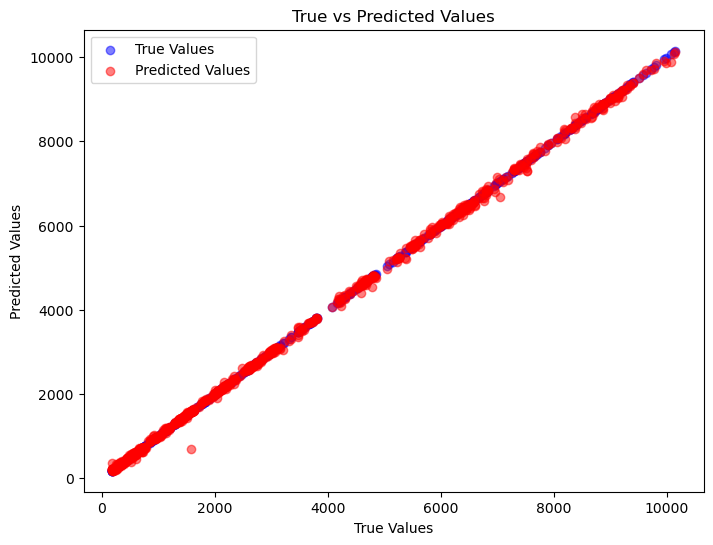

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(y_test, y_pred_knn, color='red', label='Predicted Values', alpha=0.5)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## <div align="center"> <u> MODELLING MLR </u> </div>

## B. Multiple Linear Regression (MLR) Model

In [15]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_mr = model.predict(X_test)

## <div align="center"> <u> EVALUATION MLR </u> </div>

### # Nilai MAE, MSE dan RMSE dari MLR

In [17]:
mae = mean_absolute_error(y_test, y_pred_mr)
mse = mean_squared_error(y_test, y_pred_mr)
rmse = np.sqrt(mse)

In [18]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 19.07858777032608
Mean Squared Error (MSE): 998.1524194478967
Root Mean Squared Error (RMSE): 31.593550282421518


### # Visualisasi Hasil MLR

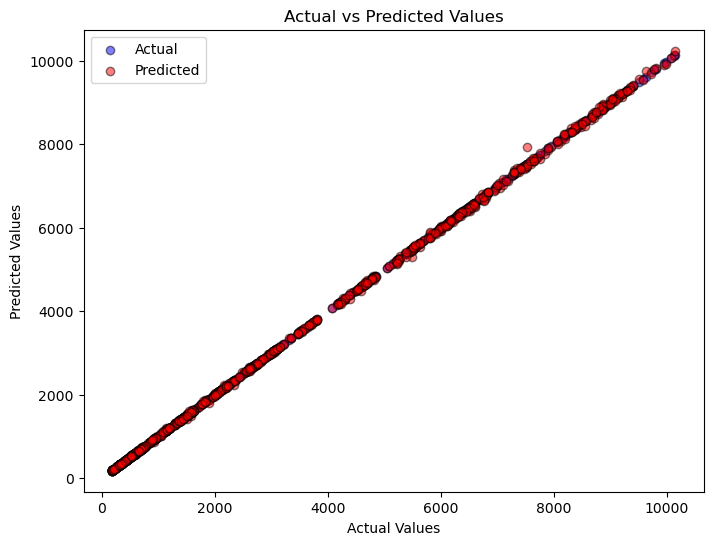

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual', edgecolor='black')
plt.scatter(y_test, y_pred_mr, color='red', alpha=0.5, label='Predicted', edgecolor='black')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## <div align="center"> <u> DEPLOYMENT </u> </div>

### # Perbandingan KNN vs MR

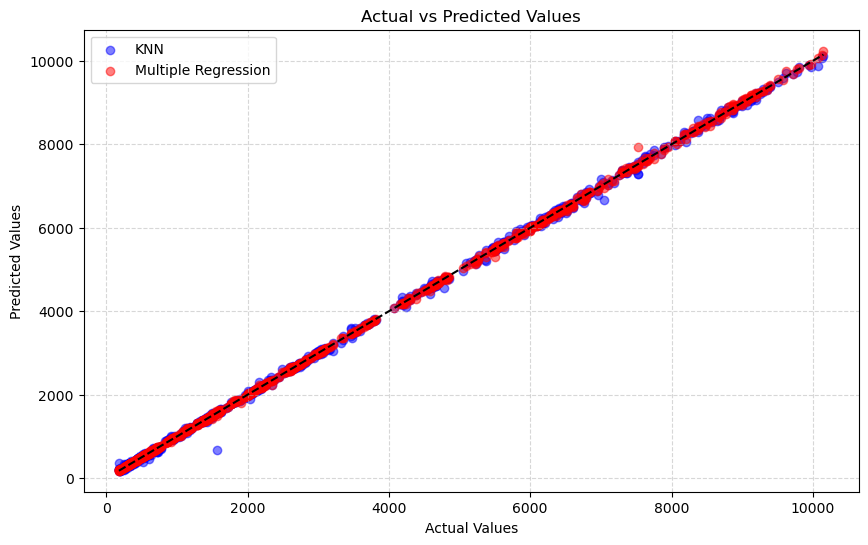

In [20]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn, color='blue', label='KNN', alpha=0.5)
plt.scatter(y_test, y_pred_mr, color='red', label='Multiple Regression', alpha=0.5)

plt.plot([min(y_test.min(), y_test.min()), max(y_test.max(), y_test.max())], 
         [min(y_test.min(), y_test.min()), max(y_test.max(), y_test.max())], 
         color='black', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---

## <div align="center"> <u> CONCLUSION </u> </div>

Berdasarkan penelitian yang kami kerjakan, pengembangan model menggunakan algoritma K-Nearest Neighbors (KNN) dan regresi linear untuk data perdagangan saham Bank Central Asia (BBCA) menunjukkan hasil evaluasi yang signifikan. Untuk algoritma KNN, nilai Mean Absolute Error (MAE) adalah 37.0364152892562, Mean Squared Error (MSE) sebesar 7196.040482954545, dan Root Mean Squared Error (RMSE) sebesar 84.82947885584672.

Sedangkan untuk regresi linear, nilai Mean Absolute Error (MAE) adalah 18.406091734635854, Mean Squared Error (MSE) sebesar 880.2581636636838, dan Root Mean Squared Error (RMSE) sebesar 29.66914497695685. 

Hasil tersebut menunjukkan bahwa **multiple linear regression memiliki kinerja yang lebih baik dibandingkan dengan KNN dalam memprediksi harga saham PT.BBCA**, dengan nilai error yang lebih rendah di semua metrik evaluasi.